In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv("parsed_England.csv")

In [3]:
df

,Unnamed: 0,subEventName,tags,positions,matchId,eventName,teamId,matchPeriod,eventSec,id,passportArea,weight,currentTeamId,height,role,birthArea,foot,shortName,currentNationalTeamId,player,status,roundId,gameweek,teamsData,seasonId,dateutc,winner,venue,label,date,referees,duration,competitionId
0,0,Simple pass,['Accurate'],"(51.45, 33.32)",2499719,Pass,1609,1H,2.758649,177959171,"{'name': 'Guadeloupe', 'id': 312, 'alpha3code'...",73.0,1609.0,175.0,"{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...","{'name': 'France', 'id': 250, 'alpha3code': 'F...",right,A. Lacazette,NaN,25413 - Alexandre Lacazette,Played,4405654,1,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",181150,2017-08-11 18:45:00,1609,Emirates Stadium,"Arsenal - Leicester City, 4 - 3","August 11, 2017 at 8:45:00 PM GMT+2","[{'refereeId': 385909, 'role': 'referee'}, {'r...",Regular,364
1,901,Simple pass,['Accurate'],"(52.5, 34.0)",2499719,Pass,1631,2H,2.836169,177960135,"{'name': 'Japan', 'id': '392', 'alpha3code': '...",70.0,1631.0,174.0,"{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...","{'name': 'Japan', 'id': '392', 'alpha3code': '...",right,S. Okazaki,12913.0,14763 - Shinji Okazaki,Played,4405654,1,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",181150,2017-08-11 18:45:00,1609,Emirates Stadium,"Arsenal - Leicester City, 4 - 3","August 11, 2017 at 8:45:00 PM GMT+2","[{'refereeId': 385909, 'role': 'referee'}, {'r...",Regular,364
2,1,High pass,['Accurate'],"(32.55, 53.04)",2499719,Pass,1609,1H,4.946850,177959172,"{'name': 'England', 'id': 0, 'alpha3code': 'XE...",75.0,1609.0,189.0,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'England', 'id': 0, 'alpha3code': 'XE...",right,R. Holding,NaN,370224 - Rob Holding,Played,4405654,1,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",181150,2017-08-11 18:45:00,1609,Emirates Stadium,"Arsenal - Leicester City, 4 - 3","August 11, 2017 at 8:45:00 PM GMT+2","[{'refereeId': 385909, 'role': 'referee'}, {'r...",Regular,364
3,902,High pass,['Not accurate'],"(65.1, 39.44)",2499719,Pass,1631,2H,5.311682,177960136,"{'name': 'England', 'id': '0', 'alpha3code': '...",79.0,1631.0,188.0,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'England', 'id': '0', 'alpha3code': '...",right,H. Maguire,2413.0,8653 - Harry Maguire,Played,4405654,1,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",181150,2017-08-11 18:45:00,1609,Emirates Stadium,"Arsenal - Leicester City, 4 - 3","August 11, 2017 at 8:45:00 PM GMT+2","[{'refereeId': 385909, 'role': 'referee'}, {'r...",Regular,364
4,2,Head pass,['Accurate'],"(53.55, 51.0)",2499719,Pass,1609,1H,6.542188,177959173,"{'name': 'Germany', 'id': '276', 'alpha3code':...",76.0,1609.0,180.0,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'Germany', 'id': '276', 'alpha3code':...",left,M. \u00d6zil,3148.0,3319 - Mesut \u00d6zil,Played,4405654,1,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",181150,2017-08-11 18:45:00,1609,Emirates Stadium,"Arsenal - Leicester City, 4 - 3","August 11, 2017 at 8:45:00 PM GMT+2","[{'refereeId': 385909, 'role': 'referee'}, {'r...",Regular,364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227333,226658,Ball out of the field,[],"(63.0, 0.0)",2499854,Interruption,1613,1H,2409.489052,210202474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Played,4405654,14,"{'1627': {'scoreET': 0, 'coachId': 9454, 'side...",181150,2017-11-28 20:00:00,0,The Hawthorns,"West Bromwich Albion - Newcastle United, 2 - 2","November 28, 2017 at 9:00:00 PM GMT+1","[{'refereeId': 381852, 'role': 'referee'}, {'r...",Regular,364
227334,227480,Cross,"['Left foot', 'High', 'Accurate']","(22.05, 7.48)",2499854,Pass,1613,2H,2410.969438,210203307,"{'name': 'Scotland', 'id': 0, 'alpha3code': 'X...",71.0,1613.0,173.0,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'England', 'id': 0, 'alpha3code': 'XE...",left,M. Ritchie,NaN,9227 - Matt Ritchie,Played,4405654,14,"{'1627':

In [4]:
df["positions"]

0         (51.45, 33.32)
1           (52.5, 34.0)
2         (32.55, 53.04)
3          (65.1, 39.44)
4          (53.55, 51.0)
               ...      
227333       (63.0, 0.0)
227334     (22.05, 7.48)
227335     (12.6, 31.28)
227336       (6.3, 17.0)
227337     (11.55, 34.0)
Name: positions, Length: 227338, dtype: object

In [5]:
df["tags"].unique()

array(["['Accurate']", "['Not accurate']", "['Interception', 'Accurate']",
       '[]', "['Lost', 'Not accurate']", "['Won', 'Accurate']",
       "['Through', 'Not accurate']",
       "['Take on right', 'Lost', 'Not accurate']",
       "['Take on left', 'Won', 'Accurate']",
       "['Free space right', 'Won', 'Accurate']",
       "['Free space left', 'Lost', 'Not accurate']",
       "['Free space left', 'Sliding tackle', 'Lost', 'Not accurate']",
       "['Neutral', 'Accurate']",
       "['Free space left', 'Won', 'Accurate']",
       "['Free space right', 'Lost', 'Not accurate']",
       "['Assist', 'Right foot', 'High', 'Accurate']",
       "['Goal', 'Right foot', 'Opportunity', 'Position: Goal low left', 'Accurate']",
       "['Interception', 'Not accurate']",
       "['Goal', 'Position: Goal low left', 'Not accurate']",
       "['Interception']", "['Free space left', 'Neutral', 'Accurate']",
       "['Free space right', 'Neutral', 'Accurate']",
       "['Left foot', 'Opportunity', 

In [6]:
df["positions"].unique()

array(['(51.45, 33.32)', '(52.5, 34.0)', '(32.55, 53.04)', ...,
       '(5.25, 14.28)', '(1.05, 38.76)', '(3.15, 66.64)'], dtype=object)

In [7]:
df["Win_Bool"] = 1*(df["teamId"] == df["winner"])

In [8]:
df = df.drop(["tags", "id", "role", "matchPeriod", "teamsData", "date", "weight", "passportArea", "dateutc", "venue", "height", "teamId", "roundId", "referees", "winner", "currentTeamId", "birthArea", "shortName", "matchId", "currentNationalTeamId", "status", "positions", "gameweek", "player", "seasonId", "competitionId", "label"], axis = 1)

In [9]:
df

,Unnamed: 0,subEventName,eventName,eventSec,foot,duration,Win_Bool
0,0,Simple pass,Pass,2.758649,right,Regular,1
1,901,Simple pass,Pass,2.836169,right,Regular,0
2,1,High pass,Pass,4.946850,right,Regular,1
3,902,High pass,Pass,5.311682,right,Regular,0
4,2,Head pass,Pass,6.542188,left,Regular,1
...,...,...,...,...,...,...,...
227333,226658,Ball out of the field,Interruption,2409.489052,NaN,Regular,0
227334,227480,Cross,Pass,2410.969438,left,Regular,0
227335,227481,Touch,Others on the ball,2412.975868,right,Regular,0
227336,227482,Air duel,Duel,2413.575387,right,Regular,0


In [10]:
df = pd.get_dummies(df)

In [11]:
df

,Unnamed: 0,eventSec,Win_Bool,subEventName_Acceleration,subEventName_Air duel,subEventName_Ball out of the field,subEventName_Clearance,subEventName_Corner,subEventName_Cross,subEventName_Foul,subEventName_Free Kick,subEventName_Free kick cross,subEventName_Free kick shot,subEventName_Goal kick,subEventName_Goalkeeper leaving line,subEventName_Ground attacking duel,subEventName_Ground defending duel,subEventName_Ground loose ball duel,subEventName_Hand foul,subEventName_Hand pass,subEventName_Head pass,subEventName_High pass,subEventName_Late card foul,subEventName_Launch,subEventName_Out of game foul,subEventName_Penalty,subEventName_Protest,subEventName_Reflexes,subEventName_Save attempt,subEventName_Shot,subEventName_Simple pass,subEventName_Simulation,subEventName_Smart pass,subEventName_Throw in,subEventName_Time lost foul,subEventName_Touch,subEventName_Violent Foul,subEventName_Whistle,eventName_Duel,eventName_Foul,eventName_Free Kick,eventName_Goalkeeper leaving line,eventName_Interruption,eventName_Offside,eventName_Others on the ball,eventName_Pass,eventName_Save attempt,eventName_Shot,foot_both,foot_left,foot_right,duration_Regular
0,0,2.758649,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,901,2.836169,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
2,1,4.946850,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
3,902,5.311682,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
4,2,6.542188,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227333,226658,2409.489052,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
227334,227480,2410.969438,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
227335,227481,2412.975868,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1
227336,227482,2413.575387,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1


In [12]:
df = df[:10000]

In [13]:
y = df["Win_Bool"]
X = df.drop(["Win_Bool"], axis = 1)

/Users/williamgong/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Win_Bool', ylabel='count'>

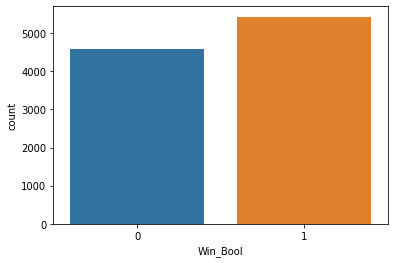

In [14]:
import seaborn as sns
sns.countplot(df["Win_Bool"])

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Scale data before applying PCA
scaling=StandardScaler()
 
# Use fit and transform method
scaling.fit(X)
Scaled_data=scaling.transform(X)
 
# Set the n_components=3
principal=PCA(n_components=0.95)
principal.fit(Scaled_data)
x=principal.transform(Scaled_data)

In [16]:
X = pd.DataFrame(x)

## Time Series Split

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.3, shuffle=False)
X_valid, X_test, y_valid, y_test = train_test_split(X_, y_, test_size=0.2, shuffle=False)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

## Modelling

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [19]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(probability = False),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "Naive Bayes Classifier": GaussianNB()
}

# Wow our scores are getting even high scores even when applying cross validation.
from sklearn.metrics import accuracy_score

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    training_score = accuracy_score(y_test, y_pred)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", 
          round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 49.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 44.0 % accuracy score
Classifiers:  SVC Has a training score of 51.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 43.0 % accuracy score
Classifiers:  GaussianNB Has a training score of 52.0 % accuracy score


In [20]:
#### Solution
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

C_grid = np.linspace(0.0001, 0.2, 100)
grid_lr = GridSearchCV(estimator=LogisticRegression(penalty='l1', solver='liblinear'),
                       cv=10, 
                       param_grid={'C': C_grid}, 
                       scoring='neg_log_loss')
grid_lr.fit(X_valid, y_valid)
Cbest = grid_lr.best_params_['C']
print(f'Best C according to gridsearch: {Cbest}')

logistic_mod = LogisticRegression(penalty='l1',  solver='liblinear', C=Cbest).fit(X_train, y_train)
print(f'Train Accuracy: {accuracy_score(logistic_mod.predict(X_train), y_train)}')
print(f'Test Accuracy: {accuracy_score(logistic_mod.predict(X_test), y_test)}')

Best C according to gridsearch: 0.2
Train Accuracy: 0.5641428571428572
Test Accuracy: 0.5183333333333333


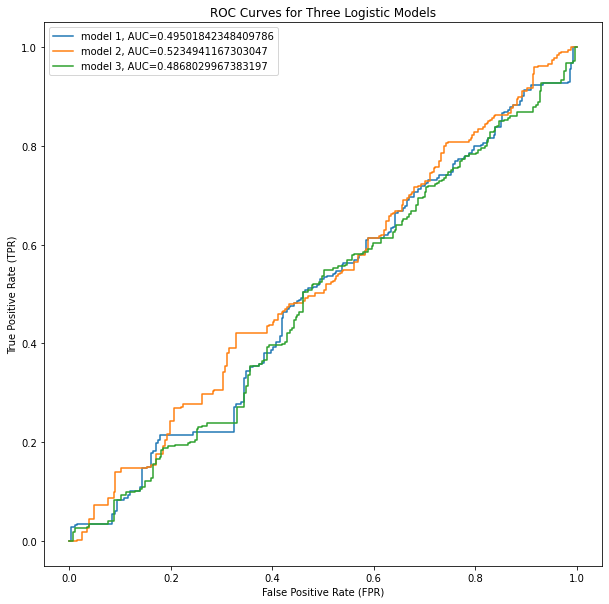

In [21]:
from sklearn.metrics import roc_curve, roc_auc_score

# choosing C via cross validation then computing FPR and TPR at all thresholds
logistic_mod_1 = LogisticRegression(penalty='l1',  solver='liblinear', C=Cbest).fit(X_train, y_train)
mod_1_preds = logistic_mod_1.predict_proba(X_test)[:,1]        # note, predictions need to be just for one of the classes
fpr_1, tpr_1, _ = roc_curve(y_test, mod_1_preds)
auc_1 = roc_auc_score(y_test, mod_1_preds)

# choosing C small
logistic_mod_2 = LogisticRegression(penalty='l1', solver='liblinear', C=0.02).fit(X_train, y_train)
mod_2_preds = logistic_mod_2.predict_proba(X_test)[:,1]
fpr_2, tpr_2, _ = roc_curve(y_test, mod_2_preds)
auc_2 = roc_auc_score(y_test, mod_2_preds)

# choosing C to be very large (no regularization)
logistic_mod_3 = LogisticRegression(solver='liblinear', C=1000).fit(X_train, y_train)
mod_3_preds = logistic_mod_3.predict_proba(X_test)[:,1]
fpr_3, tpr_3, _ = roc_curve(y_test, mod_3_preds)
auc_3 = roc_auc_score(y_test, mod_3_preds)


fig = plt.figure(figsize=(10,10))
plt.plot(fpr_1, tpr_1, label="model 1, AUC="+str(auc_1))
plt.plot(fpr_2, tpr_2, label="model 2, AUC="+str(auc_2))
plt.plot(fpr_3, tpr_3, label="model 3, AUC="+str(auc_3))
plt.ylabel("True Positive Rate (TPR)")
plt.xlabel("False Positive Rate (FPR)")
plt.title("ROC Curves for Three Logistic Models")
plt.legend()
plt.show()